### Ch1 Figure1

In [1]:
# What if their reports showed that customers are 2% more likely to click on a car if it's red. They could share that with car dealerships and generate new revenue.

# generate random data
brands_models = {'Honda': ['Civic', 'Fit', 'CR-V', 'Accord', 'Odyssey'],
                 'Toyota': ['Camry', 'Corolla', 'Yaris', 'Prius', 'RAV4', '4Runner'],
                 'Ford': ['Focus', 'Mustang', 'Fiesta', 'Explorer', 'Escape'],
                 'Chevy': ['Camaro', 'Cruze', 'Impala', 'Malibu', 'Sonic'],
                 'Nissan': ['Juke', 'Sentra', 'Altima', 'Maxima', 'Versa', 'Pathfinder']}
brands = ['Honda', 'Toyota', 'Ford', 'Chevy', 'Nissan']
colors = ['red' ,'black', 'silver', 'blue', 'dark-blue', 'white']
data = []
n_records = 1000

for i in range(n_records):
    if rd.random()>.23:
        rd_color = rd.randint(0, len(colors)-2)+1
    else:
        rd_color = 0
    if rd_color == 0:
        if rd.random()>.30:
            rd_brand = rd.randint(0,len(brands)-2) + 1
        else:
            rd_brand = 0
    else:
        rd_brand = rd.randint(0,len(brands)-1)
    rd_models = rd.randint(0, len(brands_models[brands[rd_brand]])-1)
    data.append([i, random_date(), brands[rd_brand], brands_models[brands[rd_brand]][rd_models], colors[rd_color]])

df = pd.DataFrame(data, columns=['transaction-id', 'timestamp', 'Brand', 'Model', 'Color'])
# df.to_csv('csv_output/ch1_fig1.csv', index=False)
df = pd.read_csv('csv_output/ch1_fig1.csv')
df.head()

,transaction-id,timestamp,Brand,Model,Color
0,0,2009-03-23 19:47:03,Nissan,Versa,white
1,1,2009-03-20 08:40:49,Chevy,Malibu,red
2,2,2009-03-03 05:14:29,Nissan,Juke,white
3,3,2009-03-09 15:20:12,Ford,Explorer,blue
4,4,2009-03-27 01:32:37,Nissan,Pathfinder,white


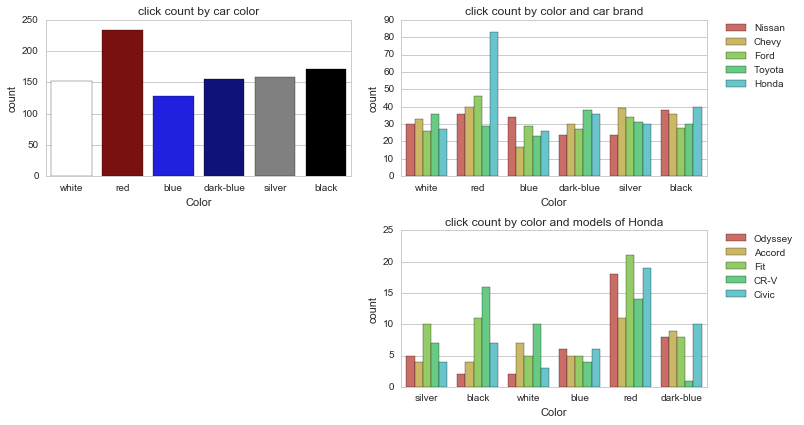

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

df = pd.read_csv('csv_output/ch1_fig1.csv')

colors = sns.color_palette("hls", 8)
color_color = ['white', 'darkred', 'blue', 'darkblue', 'grey', 'black']

f, ax = plt.subplots(2,2, figsize=(10,6))
sns.countplot(x='Color', data=df, ax=ax[0][0], palette=color_color);
ax[0][0].set_title('click count by car color');
sns.countplot(x='Color', hue='Brand', data=df, ax=ax[0][1], palette=colors);
ax[0][1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax[0][1].set_title('click count by color and car brand');
sns.countplot(x='Color', hue='Model', data=df[df.Brand=='Honda'], ax=ax[1][1], palette=colors);
ax[1][1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax[1][1].set_title('click count by color and models of Honda')
ax[1][0].axis('off');

f.tight_layout()
f.savefig('svg_output/ch1_fig1.svg', format='svg', bbox_inches='tight')

Customer are more likely to click when the color of the car is red. However, this observation does not apply to all the brands, for Toyota, the color with highest click counts is actually dark-blue. For Honda, especially, the red has the highest click count, however, that's not true to all models, for CR-V for example, black is the one with highest click count.

In [3]:
%load_ext rpy2.ipython

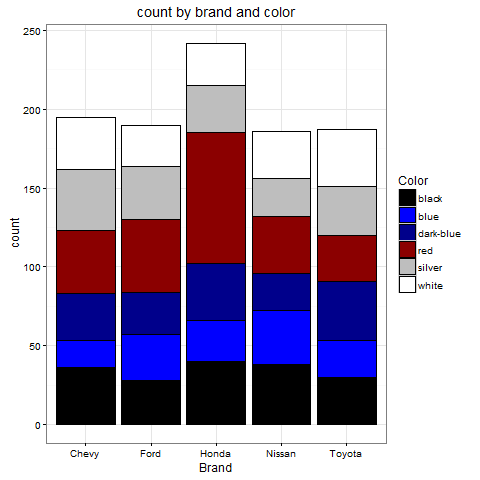

In [4]:
%%R

df = read.csv('csv_output/ch1_fig1.csv')
df$Brand = as.factor(df$Brand)
df$Color = as.factor(df$Color)

require("ggplot2")
ggplot(df, aes(Brand, fill=Color)) + geom_bar(colour="black") + ggtitle('count by brand and color') + scale_fill_manual(values = c("white" = "white", "red" = "darkred", 'blue' = 'blue', 'dark-blue' = 'darkblue', 'silver' = 'grey', 'black' = 'black')) + theme_bw()
# ggsave("svg_output/ch1_fig1_R.svg")